<a href="https://colab.research.google.com/github/julihocc/ulsaPye/blob/master/Actividad_102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ortools

     |████████████████████████████████| 14.4 MB 93 kB/s 


# Configuración de la red

In [2]:
from ortools.graph import pywrapgraph
import graphviz as gv
from IPython import display

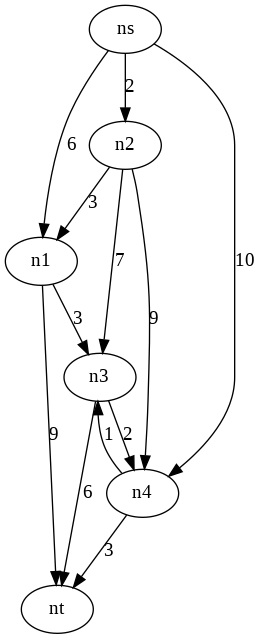

In [3]:
labels = ["ns","n1","n2","n3","n4","nt"]

flow_setup = {
    (0,1): {"cost":6, "capacity":100},
    (0,2): {"cost":2, "capacity":100},
    (0,4): {"cost":10, "capacity":100},
    (1,3): {"cost":3, "capacity":100},
    (1,5): {"cost":9, "capacity":100},
    (2,1): {"cost":3, "capacity":100},
    (2,3): {"cost":7, "capacity":100},
    (2,4): {"cost":9, "capacity":100},
    (3,4): {"cost":2, "capacity":100},
    (3,5): {"cost":6, "capacity":100},
    (4,3): {"cost":1, "capacity":100},
    (4,5): {"cost":3, "capacity":100}
    }

supplies = [1,0,0,0,0,-1]

f = gv.Digraph(name= "red_ejemplo_3", format = "png")
for k, v in flow_setup.items():
    f.edge(labels[k[0]], labels[k[1]], label=str(v["cost"]))
f.view()

display.Image("red_ejemplo_3.gv.png")

# Solución

In [4]:
min_cost_flow = pywrapgraph.SimpleMinCostFlow()

for nodes, setup in flow_setup.items():
    a, b = nodes
    min_cost_flow.AddArcWithCapacityAndUnitCost(a, b, setup["capacity"], setup["cost"])

for i in range(0, len(supplies)):
    min_cost_flow.SetNodeSupply(i, supplies[i])


solution = {}

if min_cost_flow.Solve() == min_cost_flow.OPTIMAL:
    print('Minimum cost:', min_cost_flow.OptimalCost())
    print('')
    print('  Arc    Flow  -  Capacity  -  Cost  -  Accumulated')
    cost_accum = 0
    for i in range(min_cost_flow.NumArcs()):
        cost = min_cost_flow.Flow(i) * min_cost_flow.UnitCost(i)
        if cost > 0:
            cost_accum += cost
            tail = min_cost_flow.Tail(i)
            head = min_cost_flow.Head(i)
            flow = min_cost_flow.Flow(i)
            capacity = min_cost_flow.Capacity(i)

            print(f'{tail} -> {head}    {flow}    -    {capacity}    -    {cost}    -    {cost_accum}')

            solution[(tail, head)] = (flow, capacity, cost, cost_accum)
else:
    print('There was an issue with the min cost flow input.')
    


Minimum cost: 13

  Arc    Flow  -  Capacity  -  Cost  -  Accumulated
0 -> 2    1    -    100    -    2    -    2
1 -> 3    1    -    100    -    3    -    5
2 -> 1    1    -    100    -    3    -    8
3 -> 4    1    -    100    -    2    -    10
4 -> 5    1    -    100    -    3    -    13


# Graficar Solución

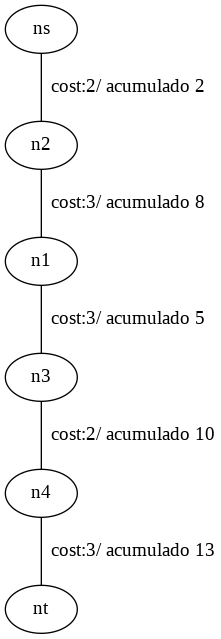

In [5]:
f = gv.Graph(name= "red_ejemplo_3_solution", format = "png")
for k, v in solution.items():
    tail, head = k
    flow, capacity, cost, cost_acum = v
    if flow>0:        
        label=f"  cost:{cost}/ acumulado {cost_acum}"
        f.edge(labels[tail], labels[head], label)
f.view()

display.Image("red_ejemplo_3_solution.gv.png")